In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.utils import check_random_state

from hmmlearn import hmm

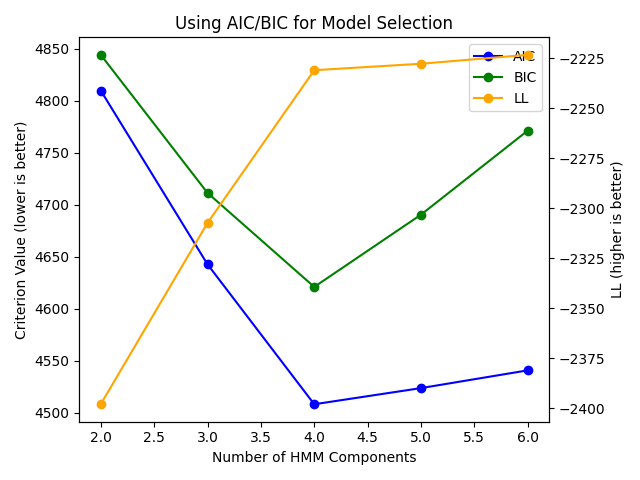